---
# **Table of Contents**
---


1. [**Introduction and Problem Statement**](#Section1)<br>
2. [**Installing & Importing Libraries**](#Section2)<br>
3. [**Data Loading and Description**](#Section3)
4. [**Preprocessing**](#Section4)
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Preparing X and y using pandas**](#Section6)<br>
    6.1 [**Splitting the dataset into the training set and test set**](#Section61)<br>
7. [**Training different regression Models**](#Section7)<br>
    7.1 [**MODEL 01 - Linear Regression**](#Section71)<br>
<!--         7.1.1 [**Training the Linear Regression model on the Training Set**](#Section711)<br>
        7.1.2 [**Predicting the Test set results**](#Section712)<br>
        7.1.3 [**Evaluating the Linear Regression Model Performance**](#Section713)<br> -->
    7.2 [**MODEL 02 - Logistic Regression**](#Section72)<br>
<!--         7.2.1 [**Training the Logistic Regression model on the Training Set**](#Section721)<br>
        7.2.2 [**Predicting the Test set results**](#Section722)<br>
        7.2.3 [**Evaluating the Logistic Regression Model Performance**](#Section723)<br> -->
    7.3 [**MODEL 03 - Polynomial Regression**](#Section73)<br>
<!--         7.3.1 [**Training the Polynomial Regression model on the Training Set**](#Section731)<br>
        7.3.2 [**Predicting the Test set results**](#Section732)<br>
        7.3.3 [**Evaluating the Polynomial Regression Model Performance**](#Section733)<br> -->
    7.4 [**MODEL 04 - Decision Tree Regression**](#Section74)<br>
<!--         7.4.1 [**Training the Decision Tree Regression model on the Training Set**](#Section741)<br>
        7.4.2 [**Predicting the Test set results**](#Section742)<br>
        7.4.3 [**Evaluating the Decision Tree Regression Model Performance**](#Section743)<br> -->
    7.5 [**MODEL 05 - Random Forest Regression**](#Section75)<br>
<!--         7.5.1 [**Training the Random Forest Regression model on the Training Set**](#Section751)<br>
        7.5.2 [**Predicting the Test set results**](#Section752)<br>
        7.5.3 [**Evaluating the Random Forest Regression Model Performance**](#Section753)<br> -->
    7.6 [**MODEL 06 - XGBoost Regression**](#Section76)<br>
<!--         7.6.1 [**Training the XGBoost Regression model on the Training Set**](#Section761)<br>
        7.6.2 [**Predicting the Test set results**](#Section762)<br>
        7.6.3 [**Evaluating the XGBoost Regression Model Performance**](#Section763)<br> -->
8. [**Conclusion**](#Section8)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

The idea of a project is to cement the topics that we learn in class and check out how to apply them in the real world. I have carefully gone through and choosen an interesting project out of the list provided  and tried to implement all that I have learnt in the class. 


**Problem Statement** 

- GetterHome a real estate company has recently acquired a lot of houses in Ames and Iowa.
  They wanted to set the price of the house according to different aspects of surroundings for that they took a survey asking the different home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad.
    So they collect different aspects of the houses they have and hired a group of data scientist to build an automated solution to predict the price of different houses according to the data they collected.


- In this project I have tried to predict the price of the houses using different regression Models and choosing the one that predicts with a higher accuracy score. 
- The data has been collected from [INSAID'S GITHUB](https://github.com/insaid2018/Term-2/tree/master/Projects)  repository.


- **Datasets**
	- Dataset link : https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv


<a name = Section2></a>
# **2. Installing & Importing Libraries**
---

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


<a name = Section3></a>
# **3. Data Loading and Description**
---

In [3]:
house_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



<a name = Section5></a>
# **5. Exploratory Data Analysis**
---

Find Missing values and replace with MEAN/MODE or NA/None

In [6]:
# missing data
total = house_df.isnull().sum().sort_values(ascending=False)
percent = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
house_df['LotFrontage'][:3]
house_df['LotFrontage'].isnull().sum()
house_df['LotFrontage']=house_df['LotFrontage'].fillna(np.mean(house_df['LotFrontage']))
house_df['LotFrontage'].isnull().sum()

0

In [8]:
set(house_df['Alley'])

{'Grvl', 'Pave', nan}

In [9]:
house_df['Alley'].isnull().sum()

1369

In [10]:
house_df['Alley']=house_df['Alley'].fillna('None')
house_df['Alley'].isnull().sum()

0

In [11]:
house_df['MasVnrType'][:3]
set(house_df['MasVnrType'])
house_df['MasVnrType'].isnull().sum()

8

In [12]:
house_df['MasVnrType']=house_df['MasVnrType'].fillna(house_df['MasVnrType'].mode()[0])
house_df['MasVnrType'].isnull().sum()

0

In [13]:
set(house_df['MasVnrType'])

{'BrkCmn', 'BrkFace', 'None', 'Stone'}

In [14]:
house_df['BsmtQual'][:3]
house_df['BsmtQual'].isnull().sum()

37

In [15]:
set(house_df['BsmtQual'])

{'Ex', 'Fa', 'Gd', 'TA', nan}

In [16]:

house_df['BsmtQual']=house_df['BsmtQual'].fillna(house_df['BsmtQual'].mode()[0])
house_df['BsmtQual'].isnull().sum()

0

In [17]:
set(house_df['BsmtCond'])
house_df['BsmtCond'].isnull().sum()

37

In [18]:
house_df['BsmtCond']=house_df['BsmtCond'].fillna(house_df['BsmtCond'].mode()[0])
house_df['BsmtCond'].isnull().sum()

0

In [19]:
set(house_df['BsmtExposure'])
house_df['BsmtExposure'].isnull().sum()

38

In [20]:
house_df['BsmtExposure']=house_df['BsmtExposure'].fillna(house_df['BsmtExposure'].mode()[0])
house_df['BsmtExposure'].isnull().sum()

0

In [21]:
set(house_df['BsmtFinType1'])
house_df['BsmtFinType1'].isnull().sum()

37

In [22]:
house_df['BsmtFinType1']=house_df['BsmtFinType1'].fillna(house_df['BsmtFinType1'].mode()[0])
house_df['BsmtFinType1'].isnull().sum()

0

In [23]:
set(house_df['BsmtFinType2'])
house_df['BsmtFinType2'].isnull().sum()

38

In [24]:
house_df['BsmtFinType2']=house_df['BsmtFinType2'].fillna(house_df['BsmtFinType2'].mode()[0])
house_df['BsmtFinType2'].isnull().sum()

0

In [25]:
set(house_df['Electrical'])
house_df['Electrical'].isnull().sum()

1

In [26]:
house_df['Electrical']=house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])
house_df['Electrical'].isnull().sum()

0

In [27]:
set(house_df['FireplaceQu'])
house_df['FireplaceQu'].isnull().sum()

690

In [28]:
house_df['FireplaceQu']=house_df['FireplaceQu'].fillna(house_df['FireplaceQu'].mode()[0])
house_df['FireplaceQu'].isnull().sum()

0

In [29]:
set(house_df['GarageType'])
house_df['GarageType'].isnull().sum()

81

In [30]:
house_df['GarageType']=house_df['GarageType'].fillna(house_df['GarageType'].mode()[0])
house_df['GarageType'].isnull().sum()

0

In [31]:
set(house_df['GarageYrBlt'])
house_df['GarageYrBlt'].isnull().sum()

81

In [32]:
house_df['GarageYrBlt']=house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].mode()[0])
house_df['GarageYrBlt'].isnull().sum()

0

In [33]:
set(house_df['GarageFinish'])
house_df['GarageFinish'].isnull().sum()

81

In [34]:
house_df['GarageFinish']=house_df['GarageFinish'].fillna(house_df['GarageFinish'].mode()[0])
house_df['GarageFinish'].isnull().sum()

0

In [35]:
set(house_df['GarageQual'])
house_df['GarageQual'].isnull().sum()

81

In [36]:
house_df['GarageQual']=house_df['GarageQual'].fillna(house_df['GarageQual'].mode()[0])
house_df['GarageQual'].isnull().sum()

0

In [37]:
set(house_df['GarageCond'])
house_df['GarageCond'].isnull().sum()

81

In [38]:
house_df['GarageCond']=house_df['GarageCond'].fillna(house_df['GarageCond'].mode()[0])
house_df['GarageCond'].isnull().sum()

0

In [39]:
set(house_df['MasVnrArea'])
house_df['MasVnrArea'].isnull().sum()

8

In [40]:
house_df['MasVnrArea']=house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean())
house_df['MasVnrArea'].isnull().sum()

0

DROPP ALL FIELDS THAT ARE NOT REQUIRED 

In [41]:
house_df=house_df.drop(['PoolQC','Fence', 'MiscFeature', 'Alley'],axis=1)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [42]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


Now that we have complete Data Let us try to build a correlation and see what all is actualy corelating  

In [43]:
data_corr = house_df.corr()
data_corr 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


__Observation:__ The 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

SINCE there are many fields whihc show a high Coorelation. let us try to seperate them from the other insignificant fields   

In [44]:
# Here we will take only those fields which show more than 0.5 correlation with our target Field (SalePrice) 
predictor_cols = []
for i in data_corr:
    if data_corr[i]['SalePrice'] > 0.5:
        innerName = data_corr[i].name
        if innerName != 'SalePrice':
            predictor_cols.append(innerName)
predictor_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

Establishing __coorelation__ between all the features using __heatmap__.

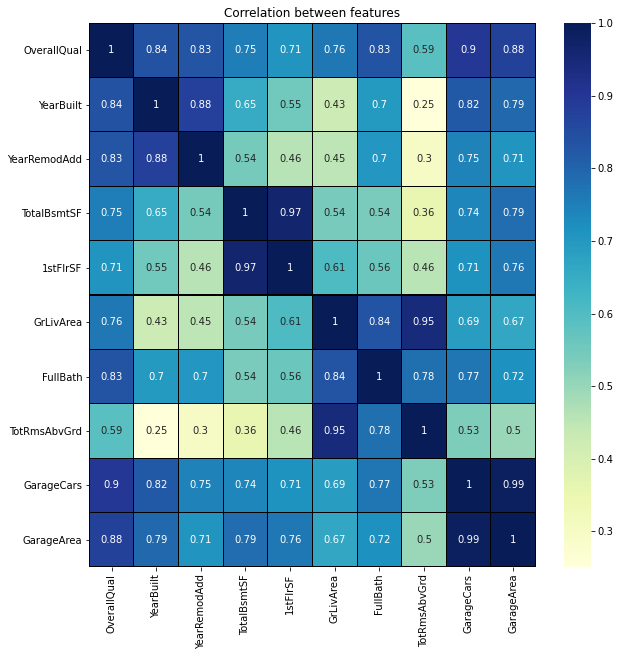

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_corr[predictor_cols].corr(), annot=True,cmap='YlGnBu',linecolor ='black',linewidth=.01);
plt.title('Correlation between features')
plt.show()

__Observations:__ these are the variables most correlated with 'SalePrice'.

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 
- 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right.
- 'FullBath'?? Really?
- 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
- It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

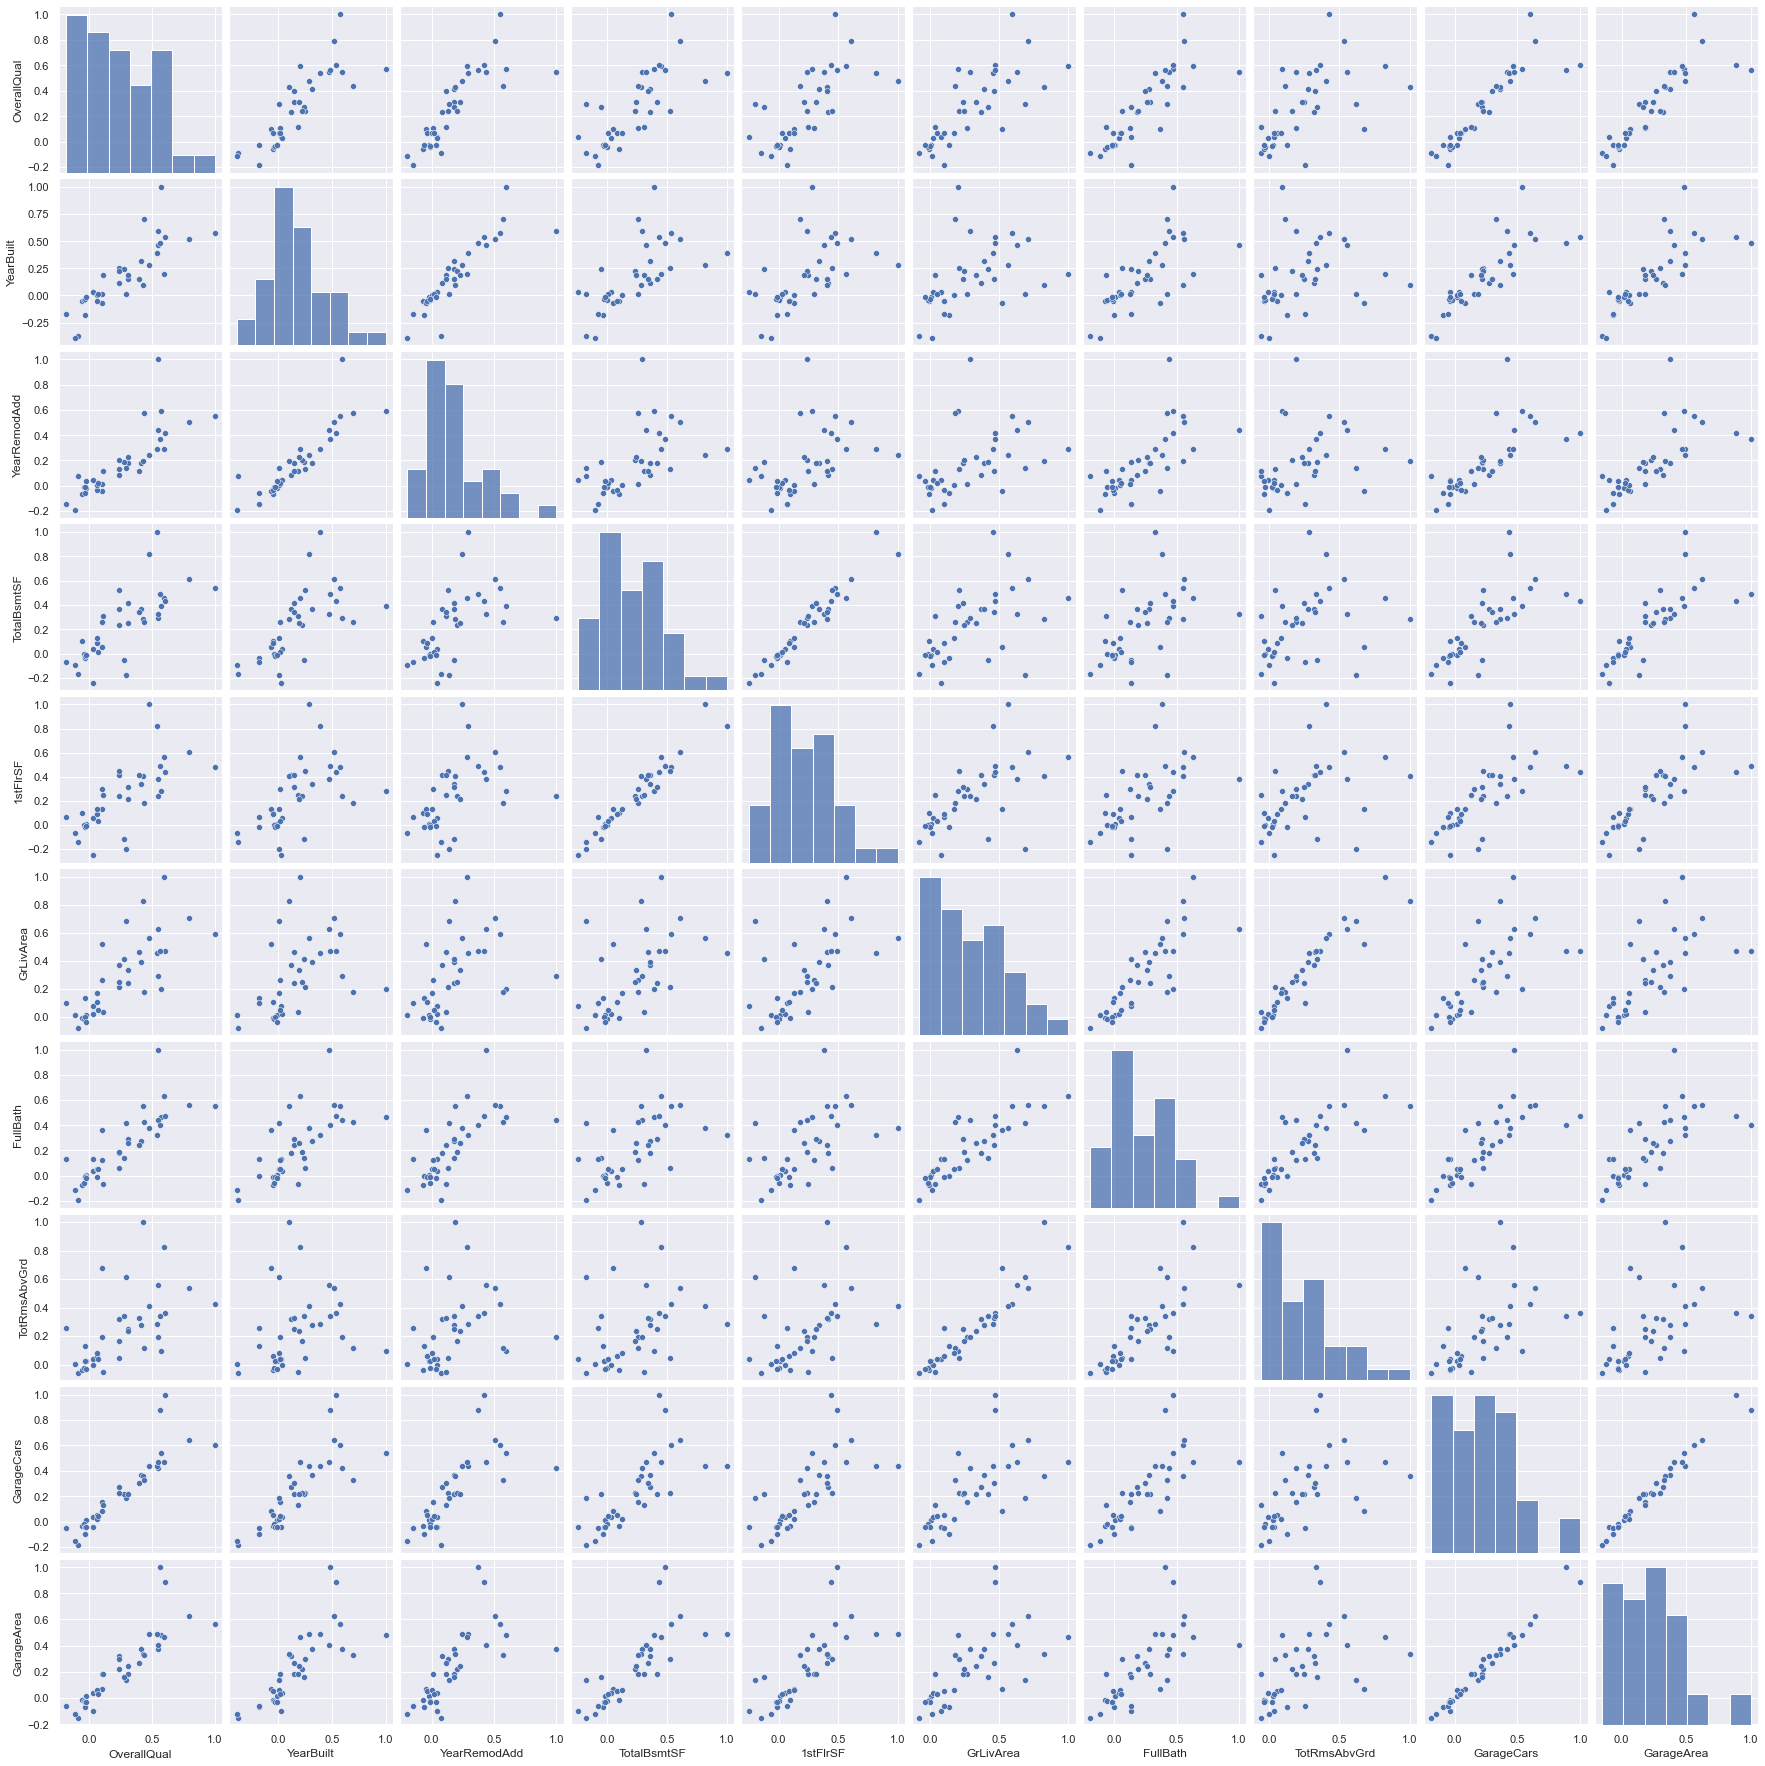

In [46]:
#scatterplot
sns.set()
sns.pairplot(data_corr[predictor_cols],height=2.5)
plt.show();

__Observations__ Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

<a name = Section6></a>
# **Preparing X and y using pandas**
---

In [47]:
# convert categorical variable into dummy
house_df = pd.get_dummies(house_df)

In [48]:
# copying all predictor variables into X and Target variable in Y
X_train_data=house_df[predictor_cols]
Y_train_data=house_df['SalePrice']

<a name = Section61></a>
## **Splitting the dataset into the training set and test set**
---

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_data, Y_train_data, test_size = 0.2, random_state=1)

In [50]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1168, 10)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 10)
y_test shape:  (292,)


<a name = Section7></a>
# **Training different regression Models**
---

To apply any machine learning algorithm on your dataset, basically there are 4 steps:

- Load the algorithm
- Instantiate and Fit the model to the training dataset
- Prediction on the test set
- Calculating Root mean square error The code block given below shows how these steps are carried out:

<a name = Section71></a>
## **MODEL 01 - Linear Regression**
---
Linear regression is a basic and commonly used type of predictive analysis. The overall idea of regression is to examine two things:

- Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
- Which variables in particular are significant predictors of the outcome variable, and in what way they do impact the outcome variable?

<a name = Section711></a>
### **Training the Linear Regression model on the Training Set**

In [51]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

LinearRegression()

In [52]:
# # Evaluating the model
# print('ln_reg Train Score is : ' , ln_reg.score(X_train, y_train)*100)
# print('ln_reg Test Score is : ' , ln_reg.score(X_test, y_test)*100)

<a name = Section712></a>
### **Predicting the Test set results**

In [53]:
ln_reg_pred = ln_reg.predict(X_test)

In [54]:
# from sklearn.metrics import mean_absolute_error 
# from sklearn.metrics import mean_squared_error 
# from sklearn.metrics import median_absolute_error

# # Predicting the Test set results
# mean_absolute_error(y_test, ln_reg_pred)
# print('Mean Square Error :     ',mean_squared_error(y_test, ln_reg_pred))
# print('Mean Absolute Error :   ',mean_absolute_error(y_test, ln_reg_pred))
# print('Median Absolute Error : ',median_absolute_error(y_test, ln_reg_pred))

# print (np.sqrt(median_absolute_error(y_test, ln_reg_pred)))

<a name = Section713></a>
### **Evaluating the Linear Regression Model Performance**

In [55]:
from sklearn.metrics import r2_score
linrreg_r2_score = r2_score(y_test, ln_reg_pred)
print ("R2 Score for Linear Regression model " + str(linrreg_r2_score))

# print('ln_reg Test Score is : ' , ln_reg.score(X_test, y_test)*100)

R2 Score for Linear Regression model 0.8135315466274413


<a name = Section72></a>
## **MODEL 02 - Logistic Regression**
---
Logistic regression is a techinque used for solving the __classification problem.__

And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of training dataset containing observations (or instances) whose categorical membership is known.

For example to predict:
- Whether an email is spam (1) or not (0) or,
- Whether the tumor is malignant (1) or not (0)

<a name = Section721></a>
### **Training the Logistic Regression model on the Training Set**

In [56]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[189  66 249 ... 120  38  23]
multiclass
multiclass
multiclass


In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train)
log_reg.fit(X_train,training_scores_encoded)

C:\Users\smsajjad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<a name = Section722></a>
### **Predicting the Test set results**

In [58]:
log_reg_pred = log_reg.predict(X_test)

<a name = Section723></a>
### **Evaluating the Logistic Regression Model Performance**

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, log_reg_pred)

logreg_r2_score = r2_score(y_test, log_reg_pred)
print ("R2 Score for Logistic Regression model " + str(logreg_r2_score))

R2 Score for Logistic Regression model -4.318270192382695


<a name = Section73></a>
## **MODEL 03 - Polynomial Regression**
---

Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

<a name = Section731></a>
### **Training the Polynomial Regression model on the Training Set**

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)

LinearRegression()

<a name = Section732></a>
### **Predicting the Test set results**

In [61]:
poly_reg_pred = pol_reg.predict(poly_reg.transform(X_test))

<a name = Section733></a>
### **Evaluating the Polynomial Regression Model Performance**

In [62]:
# Evaluating the polynomial regression Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, poly_reg_pred)
polynmreg_r2_score = r2_score(y_test, poly_reg_pred)
print ("R2 Score for POLYNOMIAL REGRESSION MODEL " + str(polynmreg_r2_score))

R2 Score for POLYNOMIAL REGRESSION MODEL 0.88291945692271


<a name = Section74></a>
## **MODEL 04 - Decision Tree Regression**
---

A __decision tree__ is one of most frequently and widely used supervised machine learning algorithms that can perform both __regression and classification tasks__.
The intuition behind the decision tree algorithm is simple, yet also very powerful.

Everyday we need to make numerous __decisions__, many smalls and a few big.
So, Whenever you are in a dilemna, if you'll keenly observe your thinking process. You'll find that, you are unconsciously using __decision tree approach__ or you can also say that decision tree approach is based on our thinking process.

- A decision tree __split the data into multiple sets__.Then each of these sets is further split into subsets to arrive at a __decision__.
- It is a very natural decision making process asking a series of question in a nested __if__ _then_ __else__ statement.
- On each node you ask a question to further split the data held by the node.

<a name = Section741></a>
### **Training the Decision Tree Regression model on the Training Set**

In [63]:
from sklearn.tree import DecisionTreeRegressor
decsn_reg = DecisionTreeRegressor(random_state = 0)
decsn_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

<a name = Section742></a>
### **Predicting the Test set results**

In [64]:
decsn_reg_pred = decsn_reg.predict(X_test)

<a name = Section743></a>
### **Evaluating the Decision Tree Regression Model Performance**

In [65]:
# Evaluating the Decision Tree regression Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, decsn_reg_pred)

DisnTreereg_r2_score = r2_score(y_test, decsn_reg_pred)
print ("R2 Score for DECISION TREE REGRESSION MODEL " + str(DisnTreereg_r2_score))

R2 Score for DECISION TREE REGRESSION MODEL 0.8278298162606693


<a name = Section75></a>
## **MODEL 05 - Random Forest Regression**
---
__Random Forest__ is considered to be the __panacea__ of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

Random Forest is a versatile machine learning method capable of performing __both regression and classification tasks__. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of __ensemble learning__ method, where __a group of weak models combine to form a powerful model.__

<a name = Section751></a>
### **Training the Random Forest Regression model on the Training Set**

In [66]:
from sklearn.ensemble import RandomForestRegressor
rndm_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rndm_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

<a name = Section752></a>
### **Predicting the Test set results**

In [67]:
rndm_reg_pred = rndm_reg.predict(X_test)

<a name = Section753></a>
### **Evaluating the Random Forest Regression Model Performance**

In [68]:
# Evaluating the random forest regression Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, rndm_reg_pred)

rndmforstreg_r2_score = r2_score(y_test, rndm_reg_pred)
print ("R2 Score for RANDOM FOREST REGRESSION MODEL " + str(rndmforstreg_r2_score))

R2 Score for RANDOM FOREST REGRESSION MODEL 0.8929024470130209


<a name = Section76></a>
## **MODEL 06 - XGBoost Regression**
---

__XGBoost__ is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners.

It tells about the difference between __actual values__ and __predicted values__, i.e how far the model results are from the real values. 

<a name = Section761></a>
### **Training the XGBoost Regression model on the Training Set**

In [69]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=0)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<a name = Section762></a>
### **Predicting the Test set results**

In [70]:
xgb_reg_pred = xgb_reg.predict(X_test)

<a name = Section763></a>
### **Evaluating the XGBoost Regression Model Performance**

In [71]:
# Evaluating the XGBooster Regression Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, xgb_reg_pred)

xgboosterreg_r2_score = r2_score(y_test, xgb_reg_pred)
print ("R2 Score for XGBooster REGRESSION MODEL " + str(xgboosterreg_r2_score))

R2 Score for XGBooster REGRESSION MODEL 0.8848051175201088


__Observation__: Now that we have all regression models predicted, lets accumulate them in a Series and sort them based on their R2_Score and lets see which one is the most closest to the benchmark set by R2_Score

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [72]:
# Series to collect the accuracy for the different algorithms: "algorithms name + score"
scores_compare = pd.Series(dtype="Int64")
scores_compare.index.name = "Model"

scores_compare['LinearRegression'] = "{:.2f}".format(linrreg_r2_score) 
scores_compare['LogisticRegression'] = "{:.2f}".format(logreg_r2_score)
scores_compare['PolynomialRegression'] = "{:.2f}".format(polynmreg_r2_score)
scores_compare['DecisionTreeRegression'] = "{:.2f}".format(DisnTreereg_r2_score)
scores_compare['RandomForestRegression'] = "{:.2f}".format(rndmforstreg_r2_score)
scores_compare['XGBoosterRegression'] = "{:.2f}".format(xgboosterreg_r2_score)

print("Accuracy scores for different algorithms")
scores_compare.sort_values(ascending=False)

Accuracy scores for different algorithms


Model
RandomForestRegression     0.89
XGBoosterRegression        0.88
PolynomialRegression       0.88
DecisionTreeRegression     0.83
LinearRegression           0.81
LogisticRegression        -4.32
dtype: object

__Observation__: Lookng at the R2Score we can clearly make out that even though the most of Models are closely predicting the best values, yet __RANDOM FOREST REGRESSION__ takes the highest preference when it comes to predicting at a more accurate level.   

<a name = Section8></a>
# **CONCLUSION**
---

Hence we will now use the __RANDOM FOREST REGRESSION__ model to predict the house prices for our test Data.   

In [73]:
SalePrice = pd.Series(rndm_reg_pred)
output_df = pd.DataFrame({'SalePrice':SalePrice})
output_df.head(10)

,SalePrice
0,207899.75
1,161695.38
2,116248.00
3,78936.25
4,147272.59
5,313210.19
6,312753.17
7,145961.20
8,222566.91
9,225331.50
